Data analysis on games by publisher

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
pd.options.display.max_rows = 20

In [2]:
TwoK = pd.read_csv('2K Games.csv')
SEGA = pd.read_csv('SEGA.csv')
Activision = pd.read_csv('Activision.csv')
Activision[['Publisher']] = 'Activision'
EA = pd.read_csv('Electronic Arts.csv')
Beth = pd.read_csv('Bethesda Softworks.csv')
Klei = pd.read_csv('Klei Entertainment.csv')
Paradox = pd.read_csv('Paradox Interactive.csv')
Warner = pd.read_csv('Warner Bros.csv')
Ubisoft = pd.read_csv('Ubisoft.csv')
Valve = pd.read_csv('Valve.csv')

publishers = [SEGA, Activision, EA, Beth, Klei, Paradox, Warner, Ubisoft, Valve]

Combining data form different publishers into one table

In [3]:
games = pd.concat(publishers)
games.index = [i for i in range(len(games))]

Changing column names for easier syntax:

In [4]:
games = games.rename(columns={'Release year': 'Year', 'Average playtime': 'Average_playtime', 'Median playtime': 'Median_playtime'})
games

,Game,Year,Price,Userscore,Metascore,Publisher,Owners,Average_playtime,Median_playtime
0,Empire: Total War,2009.0,$19.99,91,90,SEGA,3584207,100.282,22.054
1,Company of Heroes,2007.0,$19.99,95,93,SEGA,2959194,14.234,2.102
2,Total War: SHOGUN 2,2011.0,$29.99,92,/,SEGA,2935118,74.240,23.006
3,"Warhammer 40,000: Dawn of War II",2009.0,$19.99,88,85,SEGA,2630289,29.030,10.342
4,Total War: ROME II - Emperor Edition,2013.0,$59.95,77,76,SEGA,2470292,123.240,42.324
5,Company of Heroes: Opposing Fronts,2007.0,$19.99,93,87,SEGA,2370767,13.156,1.018
6,Napoleon: Total War,2010.0,$19.99,93,81,SEGA,2257973,66.114,13.222
7,Company of Heroes: Tales of Valor,2009.0,$19.99,94,70,SEGA,2159586,28.198,2.318
8,Company of Heroes 2,2013.0,$29.99,76,80,SEGA,2061199,71.072,12.234
9,"Warhammer 40,000: Dawn of War II - Chaos Rising",2010.0,$19.99,91,85,SEGA,1823478,23.198,7.240


Average game rating for each publisher

In [5]:
By_publisher = games.groupby('Publisher')
By_publisher['Userscore'].mean()

Publisher
Activision             74.666667
Bethesda Softworks     82.923077
Electronic Arts        81.475000
Klei Entertainment     91.750000
Paradox Interactive    72.160000
SEGA                   80.754098
Ubisoft                75.405172
Valve                  91.451613
Warner Bros            79.742857
Name: Userscore, dtype: float64

In [8]:
year = games[games.Year == 2016]
year.sort_values('Metascore', ascending = False)[0:5]

,Game,Year,Price,Userscore,Metascore,Publisher,Owners,Average_playtime,Median_playtime
19,Total War: WARHAMMER,2016.0,$59.99,68,86,SEGA,1061405,73.342,38.192
179,Dishonored 2,2016.0,$59.99,71,86,Bethesda Softworks,472978,18.216,12.282
166,DOOM,2016.0,$59.99,91,85,Bethesda Softworks,1632391,15.336,9.036
206,Hearts of Iron IV,2016.0,$39.99,83,83,Paradox Interactive,467860,86.084,43.138
184,Don't Starve Together Beta,2016.0,$14.99,96,83,Klei Entertainment,5553465,22.204,7.330


Example of a game companies average game quality through time, Activision is used for the example

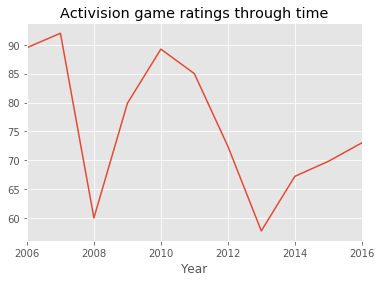

In [18]:
activision = games[games.Publisher == 'Activision']
qual = activision.groupby('Year').Userscore.mean()
qual.plot(title = 'Activision game ratings through time')
plt.show()

We can use the data for median and average playtime to find the most "polarizing" games, which are games where most owners have very little playtime, but some players have a large amount of playtime.

In [12]:
game_pol = games[['Game', 'Price', 'Userscore', 'Metascore', 'Owners', 'Average_playtime', 'Median_playtime']]
game_pol['Ratio'] = game_pol.Average_playtime / game_pol.Median_playtime
game_pol

C:\Users\Tine\AppData\Local\Programs\Python\Python35-32\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Game,Price,Userscore,Metascore,Owners,Average_playtime,Median_playtime,Ratio
0,Empire: Total War,$19.99,91,90,3584207,100.282,22.054,4.547112
1,Company of Heroes,$19.99,95,93,2959194,14.234,2.102,6.771646
2,Total War: SHOGUN 2,$29.99,92,/,2935118,74.240,23.006,3.226984
3,"Warhammer 40,000: Dawn of War II",$19.99,88,85,2630289,29.030,10.342,2.807001
4,Total War: ROME II - Emperor Edition,$59.95,77,76,2470292,123.240,42.324,2.911823
5,Company of Heroes: Opposing Fronts,$19.99,93,87,2370767,13.156,1.018,12.923379
6,Napoleon: Total War,$19.99,93,81,2257973,66.114,13.222,5.000303
7,Company of Heroes: Tales of Valor,$19.99,94,70,2159586,28.198,2.318,12.164797
8,Company of Heroes 2,$29.99,76,80,2061199,71.072,12.234,5.809384
9,"Warhammer 40,000: Dawn of War II - Chaos Rising",$19.99,91,85,1823478,23.198,7.240,3.204144


In [15]:
game_pol.sort_values('Ratio', ascending=False)

,Game,Price,Userscore,Metascore,Owners,Average_playtime,Median_playtime,Ratio
313,The Settlers Online,Free,35,/,350705,23.138,0.090,257.088889
214,Victoria: Revolutions,$9.99,71,/,166064,13.318,0.066,201.787879
415,Team Fortress Classic,$4.99,83,/,5481428,13.294,0.096,138.479167
310,Anno Online,Free,50,/,392979,15.168,0.132,114.909091
407,Day of Defeat,$4.99,90,79,7601393,14.036,0.162,86.641975
330,Might & Magic Heroes Online,Free,38,/,243219,5.126,0.090,56.955556
328,Heroes of Might & Magic V: Hammers of Fate,$9.99,83,66,244167,14.114,0.300,47.046667
393,Dota 2,Free,89,90,92974419,199.048,4.306,46.225732
421,Source Filmmaker,Free,92,/,1160171,15.090,0.336,44.910714
409,Ricochet,$4.99,81,/,7470400,1.018,0.024,42.416667


We can notice that a lot of the games with very large differences in playtime are free. Free games can have a lot of "owners" which downloaded the game only to try it for a short time. This lowers the median playtime and shows in this data.